In [11]:
import numpy as np
import torch
from skimage import feature, color, io, draw
from torchvision import datasets, transforms
import plotly.express as px
import matplotlib.pyplot as plt

In [27]:
flowers = datasets.Flowers102("data/flowers", transform=transforms.Resize((224,224)), download=True)

In [28]:
img = flowers[4][0]
img

tensor([[[0.1412, 0.1373, 0.1373,  ..., 0.0667, 0.0706, 0.0784],
         [0.1490, 0.1451, 0.1412,  ..., 0.0863, 0.0824, 0.0784],
         [0.1529, 0.1451, 0.1333,  ..., 0.0745, 0.0784, 0.0784],
         ...,
         [0.1647, 0.1608, 0.1451,  ..., 0.2392, 0.2510, 0.2667],
         [0.1765, 0.1647, 0.1373,  ..., 0.2235, 0.2549, 0.2706],
         [0.2039, 0.1922, 0.1608,  ..., 0.1961, 0.2314, 0.2510]],

        [[0.2235, 0.2157, 0.2039,  ..., 0.1098, 0.1176, 0.1255],
         [0.2275, 0.2157, 0.2039,  ..., 0.1255, 0.1255, 0.1255],
         [0.2235, 0.2118, 0.1922,  ..., 0.1216, 0.1255, 0.1255],
         ...,
         [0.1451, 0.1451, 0.1333,  ..., 0.3569, 0.3725, 0.3843],
         [0.1529, 0.1490, 0.1255,  ..., 0.3412, 0.3725, 0.3922],
         [0.1804, 0.1765, 0.1490,  ..., 0.3137, 0.3490, 0.3725]],

        [[0.0980, 0.0941, 0.0941,  ..., 0.0627, 0.0392, 0.0392],
         [0.1020, 0.0941, 0.0902,  ..., 0.0706, 0.0471, 0.0392],
         [0.0863, 0.0824, 0.0745,  ..., 0.0471, 0.0431, 0.

In [29]:
img = color.rgb2gray(img)
feat = feature.canny(img, sigma=2)
io.imshow(feat)

ValueError: the input array must have size 3 along `channel_axis`, got (3, 224, 224)

In [15]:
indices = torch.tensor(list(zip(*np.where(feat))), dtype=torch.int)
indices

tensor([[  1,  12],
        [  1,  18],
        [  1,  19],
        ...,
        [222,  98],
        [222, 139],
        [222, 140]], dtype=torch.int32)

In [16]:
choice = torch.multinomial(torch.ones(len(indices)), 100)
indices_100 = torch.index_select(indices, dim=0, index=choice)
indices_100

tensor([[144, 130],
        [207,  79],
        [158, 108],
        [ 47, 152],
        [ 64, 175],
        [ 44, 147],
        [ 96, 175],
        [ 76, 119],
        [ 14,  33],
        [186, 110],
        [ 24,  97],
        [ 13, 167],
        [ 19,  15],
        [130, 125],
        [191, 162],
        [ 26, 137],
        [152, 119],
        [ 28,  22],
        [  8,   7],
        [ 94,  49],
        [136, 141],
        [134, 145],
        [ 29, 169],
        [  2,  20],
        [216, 104],
        [  5,  36],
        [ 33,  45],
        [ 40, 169],
        [ 19,  32],
        [ 28,  88],
        [121, 144],
        [ 37,  39],
        [ 58,  39],
        [100, 184],
        [119, 130],
        [ 45,  57],
        [131, 198],
        [178,  93],
        [ 89, 192],
        [111, 208],
        [ 92, 187],
        [182,  57],
        [122, 194],
        [163, 108],
        [ 42, 144],
        [147, 183],
        [137, 134],
        [ 47, 153],
        [  2,  37],
        [ 96, 189],


C:\Users\kamil\anaconda3\envs\vit_sampling\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


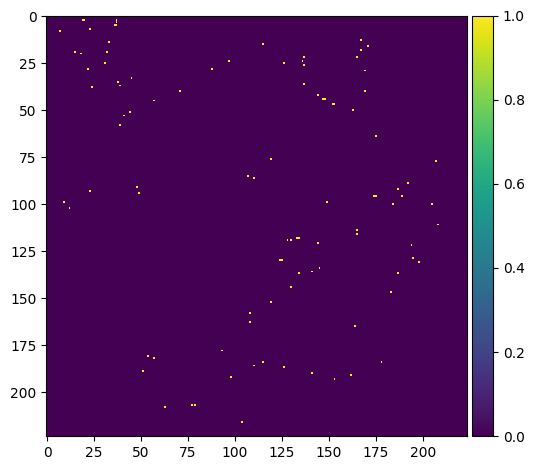

In [17]:
image = torch.zeros((224, 224))
image[indices_100[:, 0], indices_100[:, 1]] = 1
io.imshow(image.numpy())

In [18]:
img_size = 224
patch_size = 32
def generate_patch(index):
    upper_left = torch.maximum(index - patch_size / 2, torch.zeros_like(index))
    lower_right = torch.minimum(index + patch_size / 2, torch.full_like(index, img_size))
    return upper_left, lower_right

In [19]:
patches = generate_patch(indices_100)
patches

(tensor([[128., 114.],
         [191.,  63.],
         [142.,  92.],
         [ 31., 136.],
         [ 48., 159.],
         [ 28., 131.],
         [ 80., 159.],
         [ 60., 103.],
         [  0.,  17.],
         [170.,  94.],
         [  8.,  81.],
         [  0., 151.],
         [  3.,   0.],
         [114., 109.],
         [175., 146.],
         [ 10., 121.],
         [136., 103.],
         [ 12.,   6.],
         [  0.,   0.],
         [ 78.,  33.],
         [120., 125.],
         [118., 129.],
         [ 13., 153.],
         [  0.,   4.],
         [200.,  88.],
         [  0.,  20.],
         [ 17.,  29.],
         [ 24., 153.],
         [  3.,  16.],
         [ 12.,  72.],
         [105., 128.],
         [ 21.,  23.],
         [ 42.,  23.],
         [ 84., 168.],
         [103., 114.],
         [ 29.,  41.],
         [115., 182.],
         [162.,  77.],
         [ 73., 176.],
         [ 95., 192.],
         [ 76., 171.],
         [166.,  41.],
         [106., 178.],
         [1

In [20]:
for i in range(100):
    upper_left = patches[0][i]
    lower_right = patches[1][i]
    r, c = draw.rectangle_perimeter(upper_left.numpy(), lower_right.numpy(), shape=img.shape, clip=True)
    image[r, c] = 1

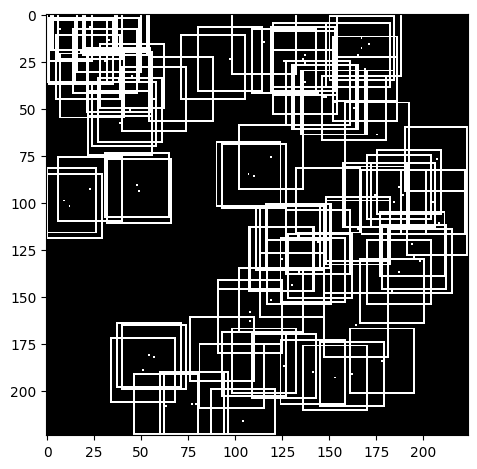

In [21]:
io.imshow(image.numpy())